In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 5:  ODE Methods - Initial Value Problems

For all of these questions write your own functions for the ODE solvers and Newton's method (you can copy from your previous homework of course).

## Question 1 - Techniques for Systems of ODEs

Consider the system

$
\begin{aligned}
v'''(x) &= x^2 v v'' - v w' \\
w''(x) &= x w w' + 4 v'
\end{aligned}
$

**(a)** (10) Write the system of differential equations as a first-order system of differential equations, $u' = f(x, u)$.

$$\vec{u} = \begin{bmatrix} v \\ v' \\v'' \\ w \\ w' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \end{bmatrix}$$
 
$$\frac{\text{d}}{\text{d}t} \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \end{bmatrix} = \begin{bmatrix} u_2 \\ u_3 \\ x^2u_1u_3 - u_1u_5 \\ u_5 \\ xu_4u_5 + 4u_2 \end{bmatrix} = \vec{f}(x, \vec{u})$$

**(b)** (10) For systems of non-linear ODEs it is often very useful to consider the linearization of the right-hand-side function $f$ and its properties as approximately linear in some region.  The Jacobian matrix $J(f)$ is often used in this context as the matrix so that

$$u' \approx J(f) u = A(x,u) u.$$

Compute the Jacobian matrix of $f(x, u)$ for the system from part (a).  The Jacobian matrix is defined as 

$$[J(f(x,u))]_{ij} = \frac{\partial}{\partial u_j}  f_i(x, u).$$

For a simple example, say

$$f(x, u) = \begin{bmatrix} f_1(x, u) \\ f_2(x, u) \end{bmatrix} = \begin{bmatrix} u_1 u_2 \\ u_1 \end{bmatrix}$$

then

$$J(f(x,u)) = \begin{bmatrix} \frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} \\ \frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2} \end{bmatrix}= \begin{bmatrix} u_2 & u_1 \\ 1 & 0 \end{bmatrix}.$$

$$f(x, u) = \begin{bmatrix} f_1(x, u) \\ f_2(x, u) \\f_3(x, u) \\ f_4(x, u) \\ f_5(x, u)\end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \end{bmatrix}$$

then

$$J(f(x,u)) = \begin{bmatrix} \frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} & \frac{\partial f_1}{\partial u_3} & \frac{\partial f_1}{\partial u_4} & \frac{\partial f_1}{\partial u_5}\\ \frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2} & \frac{\partial f_2}{\partial u_3} & \frac{\partial f_2}{\partial u_4} & \frac{\partial f_2}{\partial u_5} \\ \frac{\partial f_3}{\partial u_1} & \frac{\partial f_3}{\partial u_2} & \frac{\partial f_3}{\partial u_3} & \frac{\partial f_3}{\partial u_4} & \frac{\partial f_3}{\partial u_5} \\ \frac{\partial f_4}{\partial u_1} & \frac{\partial f_4}{\partial u_2} & \frac{\partial f_4}{\partial u_3} & \frac{\partial f_4}{\partial u_4} & \frac{\partial f_4}{\partial u_5} \\ \frac{\partial f_5}{\partial u_1} & \frac{\partial f_5}{\partial u_2} & \frac{\partial f_5}{\partial u_3} & \frac{\partial f_5}{\partial u_4} & \frac{\partial f_5}{\partial u_5}\end{bmatrix}= \begin{bmatrix} 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 \\ x^2u_3-u_5 & 0 & x^2u_1 & 0 & -u_1 \\ 0 & 0 & 0 & 0 & 1 \\ 0 & 4 & 0 & xu_5 & xu_4 \end{bmatrix}.$$

## Question 2 - Lipschitz Constants

(15) The Lipschitz constant is defined as the constant $L\in\mathbb{R}$ such that

$$||f(x, u) - f(x, u^*)|| \leq L ||u - u^*||.$$

The Lipschitz constant is useful for describing how much $f(x, u)$ changes if we change $u$.  This in turn then describes how much the slope of the solution $u'$ changes if $u$ is changed since $u' = f$.    

Now consider the system of ODEs

\begin{equation*}
\begin{split}
u_1' &= 3u_1 + 4u_2,\\
u_2' &= 5u_1 - 6u_2.\\
\end{split}
\end{equation*}

For the system of equations above find the Lipschitz constant if we use the $\ell_2$ norm which is defined as

$$|| v ||_{2} = \left (\sum^n_{i=1} v_i^2 \right )^{1/2}.$$

Note that the Lipschitz constant $L$ also provides an estimate to how long (or how much) we can trust the linearization given by the Jacobian $J$ in the last question.

Because we have ODEs 
\begin{equation*}
\begin{split}
u_1' &= 3u_1 + 4u_2,\\
u_2' &= 5u_1 - 6u_2.\\
\end{split}
\end{equation*}

Then, we have $$f(x, u) = Au = \begin{bmatrix}3 & 4 \\5 & -6 \end{bmatrix}\begin{bmatrix} u_1' \\ u_2' \end{bmatrix}$$

$$f(x, u^*) = Au^* = \begin{bmatrix}3 & 4\\ 5 & -6 \end{bmatrix}\begin{bmatrix} u_1'^* \\ u_2'^* \end{bmatrix}$$

$$||f(x, u) - f(x, u^*)|| = ||Au - Au^*|| \leq L ||u - u^*||$$

$$\frac{||Au - Au^*||}{||u - u^*||} \leq L$$

$$\frac{||A(u - u^*)||}{||u - u^*||} \leq L$$

$$||A|| \leq L$$

Because $||A|| = 7.94509986076$, the smallest L is 7.94509986076.

Therefore, the Lipschitz constant L is 7.94509986076

## Question 3 - Orbits

Newton's equations for the motion of a particle (he sure gets around doesn't he) in planar orbit with eccentricity $e$ where $0 < e < 1$ are

$$\begin{aligned}
    x''(t) &= -\frac{x}{r^3}, ~~~~ &x(0) &= 1 - e, ~~~~ &x'(0) &= 0, \\
    y''(t) &= -\frac{y}{r^3}, ~~~~ &y(0) &= 0, ~~~~ &y'(0) &= \sqrt{\frac{1 + e}{1 - e}}
\end{aligned}$$

with $r^2 = x^2 + y^2.$

**(a)** (5) Reformulate the problem as an initial value problem for a system of first-order differential equations.

$$\vec{u} = \begin{bmatrix} x \\ x' \\ y \\ y' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4\end{bmatrix}$$
 
$$\frac{\text{d}}{\text{d}t} \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{bmatrix} = \begin{bmatrix} u_2 \\ -\frac{u_1}{\sqrt{u_1^2 + u_3^2}^3} \\ u_4 \\ -\frac{u_3}{\sqrt{u_1^2 + u_3^2}^3} \end{bmatrix} = \vec{f}(r, \vec{u})$$

**(b)** (15) Write a function that computes the solution to the IVP from (b) given a provided set of time steps and eccentricity $e$ using a 2nd order Runge-Kutta method.  The function should only return the values of $x$ and $y$.

In [2]:
def f(t, u):
    return numpy.array([u[1], -u[0]/numpy.sqrt(u[0]**2 + u[2]**2)**3, u[3], -u[2]/numpy.sqrt(u[0]**2 + u[2]**2)**3])

def solve_orbit_RK2(t, e):
    """This function computes the solution to the IVP from (a)
    given a provided set of time steps and eccentricity e using
    a 2nd order R-K method

    Args:
        t (int): Time steps.
        e (float): eccentricity e.

    Returns:
        x : the values of x.
        y : the values of y.
    """

    ### INSERT CODE HERE
    delta_t = t[1] - t[0]
    u_2 = numpy.empty((4, len(t)))
    u_2[:, 0] = [1.0-e, 0.0, 0.0, numpy.sqrt((1.0+e)/(1.0-e))]
    # 2nd order Runge_Kutta method
    for (n, t_n) in enumerate(t[1:]):
        u_2[:, n+1] = u_2[:, n] + 0.5 * delta_t * f(t_n, u_2[:, n])
        u_2[:, n+1] = u_2[:, n] + delta_t * f(t_n, u_2[:, n+1])
    x = u_2[0]
    y = u_2[2]
    return x, y

In [3]:
# Testing to make sure that the solution remains bounded in the testing interval
x, y = solve_orbit_RK2(numpy.linspace(0.0, 10.0, 1000), 0.9)
assert(numpy.all(numpy.abs(x) < 10.0))
assert(numpy.all(numpy.abs(y) < 10.0))
print "Solution remains bounded for the testing interval."

Solution remains bounded for the testing interval.


**(c)** (5) Plot the trajectory of the orbiting particle parametrically given $e = 0.9$ and times between $t = [0, 100]$.

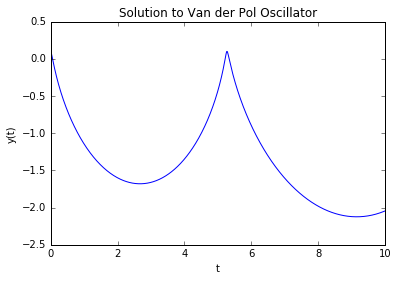

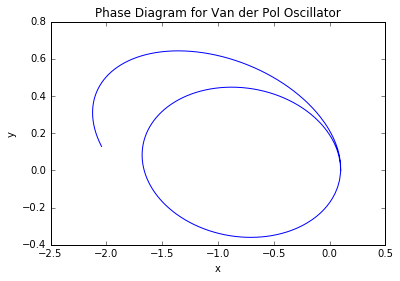

In [4]:
t = numpy.linspace(0.0, 10.0, 1000)
e = 0.9
### INSERT CODE HERE
def f(t, u):
    return numpy.array([u[1], -u[0]/numpy.sqrt(u[0]**2 + u[2]**2)**3, u[3], -u[2]/numpy.sqrt(u[0]**2 + u[2]**2)**3])

#initial the value
delta_t = t[1] - t[0]
u_2 = numpy.empty((4, len(t)))
u_2[:, 0] = [1.0-e, 0.0, 0.0, numpy.sqrt((1.0+e)/(1.0-e))]

# 2nd order R-K
for (n, t_n) in enumerate(t[1:]):
    u_2[:, n+1] = u_2[:, n] + 0.5 * delta_t * f(t_n, u_2[:, n])
    u_2[:, n+1] = u_2[:, n] + delta_t * f(t_n, u_2[:, n+1])

#plot the graph
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, u_2[0,:])
axes.set_title("Solution to Van der Pol Oscillator")
axes.set_xlabel("t")
axes.set_ylabel("y(t)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(u_2[0,:], u_2[2, :])
axes.set_title("Phase Diagram for Van der Pol Oscillator")
axes.set_xlabel("x")
axes.set_ylabel("y")

plt.show()

## Question 4 - SciPy Integrate

Consider the decay process
$$
    A \overset{K_1}{\rightarrow} B \overset{K_2}{\rightarrow} C \overset{K_3}{\rightarrow} D
$$
represented by the system of ODEs
\begin{align*}
    \frac{\text{d}A}{\text{d}t} &= -K_1 A \\
    \frac{\text{d}B}{\text{d}t} &= K_1 A - K_2 B \\
    \frac{\text{d}C}{\text{d}t} &= K_2 B - K_3 C \\
    \frac{\text{d}D}{\text{d}t} &= K_3 C \\
\end{align*}

**(a)** (10) Write a function that uses `scipy.integrate` to compute the solution to the system of ODEs given an initial condition and time points to output at.  This function should take in the time points for the output, an initial condition, the ODE integrator to use (default to "dopri5"), and the reaction rates $K_1$, $K_2$, and $K_3$.

In [5]:
import scipy.integrate as integrate

def solve_decay_system(t, u_0, solver_type="dopri5", K_1=0.0, K_2=0.0, K_3=0.0):
    """This function computes the solution to the system of ODEs given 
    an initial condition and time points to output at.

    Args:
        t (int): Time steps.
        u_0 (array): the values of u.

    Returns:
        U: the result array
    """
    ### INSERT CODE HERE
    f = lambda t, u: numpy.array([-u[0], u[0] - 2.0*u[1], 2.0*u[1] - 3.0*u[2], 3.0*u[2]])
    U = numpy.empty((len(t), 4))
    U[0, :] = u_0
    #initial value
    integrator = integrate.ode(f)
    integrator.set_integrator("dopri5")
    integrator.set_initial_value(U[0, :])
    #fill the array
    for (n, t_n) in enumerate(t[1:]):
        integrator.integrate(t_n)
        if not integrator.successful():
            break
        U[n + 1, :] = integrator.y

    return U

In [6]:
t = numpy.linspace(0.0, 10.0, 10)
u_0 = numpy.array([1.0, 0.0, 0.0, 0.0])
U = solve_decay_system(t, u_0, solver_type='dopri5', K_1=1.0, K_2=2.0, K_3=3.0)
U_sol = numpy.array([[1.0000000000000000e+00, 0.0000000000000000e+00,
                      0.0000000000000000e+00, 0.0000000000000000e+00],
                     [3.2919298826277271e-01, 2.2082495381343401e-01,
                      1.4813096181267352e-01, 3.0185109611111993e-01],
                     [1.0836802654276900e-01, 9.6624368667878130e-02,
                      8.6153390524786266e-02, 7.0885421426456674e-01],
                     [3.5673996630001523e-02, 3.4401353001617396e-02,
                      3.3174114479337484e-02, 8.9675053588904374e-01],
                     [1.1743631968628626e-02, 1.1605715517361529e-02,
                      1.1469419325266718e-02, 9.6518123318874338e-01],
                     [3.8659219913406520e-03, 3.8509760174843801e-03,
                      3.8360878593115726e-03, 9.8844701413186375e-01],
                     [1.2726346009991362e-03, 1.2710149139283067e-03,
                      1.2693972897971615e-03, 9.9618695319527573e-01],
                     [4.1894244902209761e-04, 4.1876692442412833e-04,
                      4.1859147343448249e-04, 9.9874369915311978e-01],
                     [1.3791293652887476e-04, 1.3789391503107924e-04,
                      1.3787489615970831e-04, 9.9958631825228084e-01],
                     [4.5399978275093905e-05, 4.5397916926305302e-05,
                      4.5395855671230534e-05, 9.9986380624912774e-01]])
numpy.testing.assert_allclose(U, U_sol)
print "Success!"

Success!


**(b)** (5) Plot your solution given the input data provided above and again using the `dopri5` integrator but increase the number of output times so you can plot a smooth solution.  Do not forget to provide the appropriate labels.

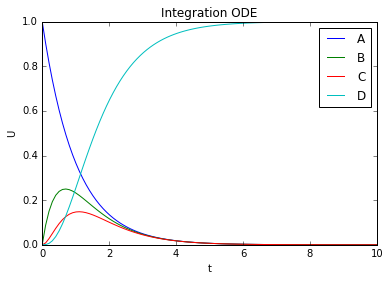

In [7]:
### INSERT CODE HERE
t = numpy.linspace(0.0, 10.0, 100)
u_0 = numpy.array([1.0, 0.0, 0.0, 0.0])
U = solve_decay_system(t, u_0, solver_type='dopri5', K_1=1.0, K_2=2.0, K_3=3.0)

#plot the graph
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, U[:, 0], label = 'A')
axes.plot(t, U[:, 1], label = 'B')
axes.plot(t, U[:, 2], label = 'C')
axes.plot(t, U[:, 3], label = 'D')
legend = axes.legend(loc='upper right')
axes.set_title("Integration ODE")
axes.set_xlabel("t")
axes.set_ylabel("U")
plt.show()

## Question 5

The Poincaré-Bendixson theorem describes the behavior of two-dimensional ODE systems that under certain conditions a system will exhibit either a stable equilibrium point or contains a limit cycle (such as we see in an oscillator).

**Poincaré-Bendixson Theorem:**  The attractor for any smooth two-dimensional bounded continuous-time autonomous system is either a stable equilibrium or a limit cycle.

Now consider the system
$$\begin{aligned}
    \frac{dx}{dt} &= \frac{xy}{x^2 + y^2} - \alpha x, \\
    \frac{dy}{dt} &= \frac{y^2}{x^2 + y^2} - \beta y + \beta -1 
\end{aligned}$$
with $\alpha, \beta \in \mathbb{R}$.  

**(a)** (5) What point may be problematic for us and violate the Poincaré-Bendixson theorem?

When $x^2 + y^2 = 0$, it will violate the Poincaré-Bendixson theorem.

**(b)**  (5) Formulate the system 
$\frac{d}{dt}\mathbf{u} = f(t, \mathbf{u})$ where $\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} $

$$\frac{\text{d}}{\text{d}t} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} \frac{u_1u_2}{u_1^2 + u_2^2} - \alpha u_1 \\ \frac{u_2^2}{u_1^2 + u_2^2} - \beta u_2 + \beta -1 \end{bmatrix} = \vec{f}(t, \vec{u})$$

**(c)** (15) Solve the above system numerically using a predictor-corrector method with the 3-step Adams-Bashforth as the predictor and the 3-step Adams-Moulton method as the corrector.  Use RK2 to boot-strap (start) the method.  Use the initial condition
$$
    (x_0, y_0) = (1, 0)
$$
and
$$
    \alpha = 0 ~~~ \text{and} ~~~ \beta = 0.7.
$$
Plot the phase-plane solution ($x$ vs. $y$) for $t_f$ at least out to $t = 100$.  Comment on what you see making sure to connect it to the Poincaré-Bendixson theorem.  You also may want to play with the initial condition and shorter time spans to examine the behavior around a particular point.

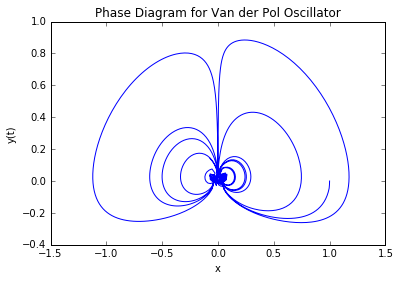

In [8]:
### INSERT CODE HERE
# Use 3-step Adams-Bashforth to compute solution
f = lambda t, u: numpy.array([u[0]*u[1]/(u[0]**2 + u[1]**2), u[1]**2/(u[0]**2 + u[1]**2) - 0.7*u[1] - 0.3])


N = 1000
t = numpy.linspace(0, 80.0, N)
delta_t = t[1] - t[0]
u_ab3 = numpy.empty((2, N))

# Use RK-2 to start the method
u_ab3[:, 0] = [1.0, 0.0]
u_ab3[:, 1] = u_ab3[:, 0] + 0.5 * delta_t * f(t[0], u_ab3[:, 0])
u_ab3[:, 1] = u_ab3[:, 0] + delta_t * f(t[0], u_ab3[:, 1])
u_ab3[:, 2] = u_ab3[:, 1] + 0.5 * delta_t * f(t[0], u_ab3[:, 1])
u_ab3[:, 2] = u_ab3[:, 1] + delta_t * f(t[0], u_ab3[:, 2])

for n in xrange(0,N-3):
    #3-step AB as the predictor
    u_ab3[:, n+3] = u_ab3[:, n + 2] + delta_t / 12.0 * (5.0*f(t[n], u_ab3[:, n]) - 16.0 * f(t[n+1], u_ab3[:, n+1]) + 23.0 * f(t[n+2], u_ab3[:, n+2]))
    #3-step AM as the corrector
    u_ab3[:, n+3] = u_ab3[:, n + 2] + delta_t / 24.0 * (f(t[n], u_ab3[:, n]) - 5.0 * f(t[n+1], u_ab3[:, n+1]) + 19.0 * f(t[n+3], u_ab3[:, n+3]))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(u_ab3[0,:], u_ab3[1, :])
axes.set_title("Phase Diagram for Van der Pol Oscillator")
axes.set_xlabel("x")
axes.set_ylabel("y(t)")

plt.show()

It contains a limit cycle. As we can see, once it reaches central point from the initial point, it will leave the point and go into the other cycle, which corresponds to equation.